In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train=pd.read_csv('./data/train_features.csv')
train_labels=pd.read_csv('./data/train_labels.csv')
test=pd.read_csv('./data/test_features.csv')

submission=pd.read_csv('./data/sample_submission.csv')

pd.options.display.max_columns=50

# accelerate, gyro Energy

In [3]:
def calc_Energy(acc, gy):
    acc_Energy = (acc[0]**2+acc[1]**2+acc[2]**2)**(1/3)
    gy_Energy = (gy[0]**2+gy[0]**2+gy[0]**2)**(1/3)
    gy_acc_Energy = ((gy[0]-acc[0])**2+(gy[1]-acc[1])**2+(gy[2]-acc[2])**2)**(1/3)
    return acc_Energy, gy_Energy, gy_acc_Energy

In [4]:
temp = calc_Energy([train['acc_x'], train['acc_y'], train['acc_z']], [train['gy_x'], train['gy_y'], train['gy_z']])

In [5]:
train['acc_Energy'] = temp[0]
train['gy_Energy'] = temp[1]
train['gy_acc_Energy'] = temp[2]
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.146962,1.016396,12.427938
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.200703,0.650776,12.865692
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.217403,3.398560,13.692643
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.209981,2.805469,15.314907
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.211254,3.805891,16.017964
...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,1.009050,13.728463,25.897316
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,1.002827,13.970862,25.722482
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,1.006239,13.258586,25.572145
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,1.001038,11.878542,25.573288


In [6]:
dt=0.02
def jerk_signal(signal): 
      return np.array([(signal[i+1]-signal[i])/dt for i in range(len(signal)-1)])

In [7]:
def get_jerk(X):
    X_dt=[]
    for i in tqdm(X['id'].unique()):
        temp=X.loc[X['id']==i]
        for v in X.columns[2:]:
            values=jerk_signal(temp[v].values)
            values=np.insert(values,0,0)
            temp.loc[:,v+'_dt']=values
        X_dt.append(temp)
    return X_dt

In [8]:
temp = get_jerk(train)
train = pd.concat(temp)
train

100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:26<00:00, 116.60it/s]


,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy,acc_x_dt,acc_y_dt,acc_z_dt,gy_x_dt,gy_y_dt,gy_z_dt,acc_Energy_dt,gy_Energy_dt,gy_acc_Energy_dt
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.146962,1.016396,12.427938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.200703,0.650776,12.865692,4.080495,-0.980114,-1.699854,44.735403,-429.504677,337.444793,2.687024,-18.281032,21.887693
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.217403,3.398560,13.692643,0.845632,0.192961,-3.546937,-196.018888,-249.173073,-4.620631,0.835012,137.389233,41.347563
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.209981,2.805469,15.314907,-0.575711,-1.762585,1.908626,316.513181,-473.763910,-121.719195,-0.371100,-29.654567,81.113199
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.211254,3.805891,16.017964,0.389598,2.130453,-0.365665,78.686055,-215.435892,-25.361098,0.063656,50.021083,35.152822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,1.009050,13.728463,25.897316,1.484646,0.303666,0.800069,-150.644663,-34.630282,-8.380088,-0.679712,47.789156,8.432977
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,1.002827,13.970862,25.722482,1.474659,-0.005442,1.775771,-39.061611,110.842743,-16.732496,-0.311171,12.119963,-8.741727
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,1.006239,13.258586,25.572145,0.915321,-0.407957,1.744566,113.799702,151.036858,-137.001896,0.170620,-35.613811,-7.516832
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,1.001038,11.878542,25.573288,1.709833,-0.796984,0.479107,211.827245,-18.171144,-44.717652,-0.260074,-69.002198,0.057150


# Fourier Transform

In [9]:
from scipy import fftpack
from numpy.fft import *

def fourier_transform_one_signal(t_signal):
    complex_f_signal= fftpack.fft(t_signal)
    amplitude_f_signal=np.abs(complex_f_signal)
    return amplitude_f_signal

In [10]:
def fourier_transform(X):
    fft=[]
    for i in tqdm(X['id'].unique()):
        temp=train.loc[X['id']==i]
        for i in train.columns[2:8]:
            temp[i]=fourier_transform_one_signal(temp[i].values)
        fft.append(temp)
    return fft

In [67]:
temp = fourier_transform(train)
train = pd.concat(temp)
train

100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:09<00:00, 316.37it/s]


,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy,acc_x_dt,acc_y_dt,acc_z_dt,gy_x_dt,gy_y_dt,gy_z_dt,acc_Energy_dt,gy_Energy_dt,gy_acc_Energy_dt
0,0,0,952123.739222,709716.301122,752400.813274,7.667599e+07,8.450058e+07,7.634767e+07,1.146962,1.016396,12.427938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,698444.505612,366565.849492,385407.515155,3.044152e+07,5.941441e+07,5.236440e+07,1.200703,0.650776,12.865692,4.080495,-0.980114,-1.699854,44.735403,-429.504677,337.444793,2.687024,-18.281032,21.887693
2,0,2,609355.039033,208440.414917,286376.193647,1.180948e+07,4.467580e+07,4.325714e+07,1.217403,3.398560,13.692643,0.845632,0.192961,-3.546937,-196.018888,-249.173073,-4.620631,0.835012,137.389233,41.347563
3,0,3,638104.015283,306895.654837,353469.097275,1.650863e+07,4.141726e+07,3.998013e+07,1.209981,2.805469,15.314907,-0.575711,-1.762585,1.908626,316.513181,-473.763910,-121.719195,-0.371100,-29.654567,81.113199
4,0,4,596893.700078,328891.972461,346623.397643,1.765714e+07,3.770056e+07,3.514985e+07,1.211254,3.805891,16.017964,0.389598,2.130453,-0.365665,78.686055,-215.435892,-25.361098,0.063656,50.021083,35.152822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,589995.340225,402433.841988,290381.668413,1.618445e+07,5.774444e+07,4.080822e+07,1.009050,13.728463,25.897316,1.484646,0.303666,0.800069,-150.644663,-34.630282,-8.380088,-0.679712,47.789156,8.432977
1874996,3124,596,614303.498002,405307.541987,312111.874563,1.586620e+07,6.163487e+07,4.380528e+07,1.002827,13.970862,25.722482,1.474659,-0.005442,1.775771,-39.061611,110.842743,-16.732496,-0.311171,12.119963,-8.741727
1874997,3124,597,617690.876692,378172.792754,325250.238672,1.547931e+07,6.458169e+07,4.626187e+07,1.006239,13.258586,25.572145,0.915321,-0.407957,1.744566,113.799702,151.036858,-137.001896,0.170620,-35.613811,-7.516832
1874998,3124,598,630517.932094,392183.376318,347581.901836,2.434721e+07,6.980820e+07,5.012296e+07,1.001038,11.878542,25.573288,1.709833,-0.796984,0.479107,211.827245,-18.171144,-44.717652,-0.260074,-69.002198,0.057150


In [133]:
def np2pd(n):
    n = n.reshape(-1, n.shape[2])
    return pd.DataFrame(n)

def pd2np(p):
    p = np.array(p)
    p = p.reshape(-1, 600, p.shape[1])
    return p

In [134]:
train.shape

(1875000, 20)

In [135]:
train_np = pd2np(train)
train_np.shape

(3125, 600, 20)

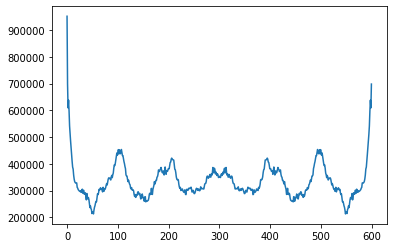

In [136]:
plt.plot(train_np[0][:, 2])
plt.show()

# Rolling

In [137]:
def rolling(X):
    for i in np.random.choice(X.shape[0], int(X.shape[0])): #, int(X.shape[0]*2/3)
        X[i] = np.roll(X[i], np.random.choice(X.shape[1]), axis= 0)
    return X

In [138]:
train_roll_np = rolling(train_np)
train_roll_np.shape

(3125, 600, 20)

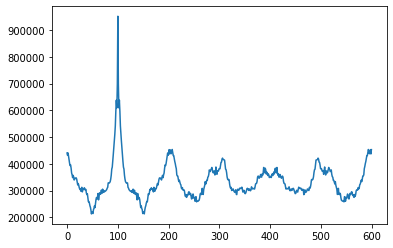

In [139]:
plt.plot(train_roll_np[0][:, 2])
plt.show()

# Jittering

In [140]:
# np.random.normal(평균, 표준편차, 개수)

In [141]:
# add sensor noise "sigma = 0.05 in paper"
def jittering(X, sigma):
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+noise

In [142]:
train_jitter_np = jittering(train_roll_np, 0.05)
train_jitter_np.shape

(3125, 600, 20)

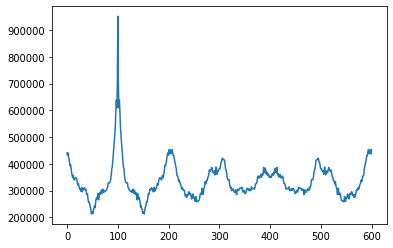

In [143]:
plt.plot(train_jitter_np[0][:, 2])
plt.show()

# Scailing

In [144]:
# scale magnitude of data "sigma = 0.1 in paper"
def scailing(X, sigma):
    scailing_factor = np.random.normal(loc=1.0, scale=sigma, size=(1, X.shape[1]))
    noise = np.matmul(np.ones((X.shape[0], 1)), scailing_factor)
    return X*noise

In [145]:
train_jitter_pd = np2pd(train_jitter_np)

In [146]:
train_scailing_pd = scailing(train_jitter_pd, 0.1)
train_scailing_pd.shape

(1875000, 20)

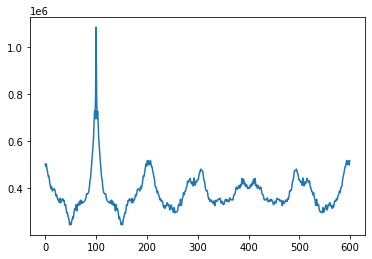

In [147]:
train_scailing_np = pd2np(train_scailing_pd)
plt.plot(train_scailing_np[0][:, 2])
plt.show()

# Warping Magnitude

In [186]:
from scipy.interpolate import CubicSpline
# change the magnitude of each sample with a smooth curve "sigma = 0.2, knot = 4 in paper"
def warping_magnitude(X, sigma, knot):
    xx = (np.ones((X.shape[1], 1))*(np.arange(0, X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_ = []
    for i in range(20):
        cs_.append(CubicSpline(xx[:, i], yy[:, i]))
        cs_[i] = cs_[i](x_range)
    return np.array(cs_).transpose()

In [187]:
warping_magnitude(train_scailing_pd, sigma, knot).shape

(1875000, 20)

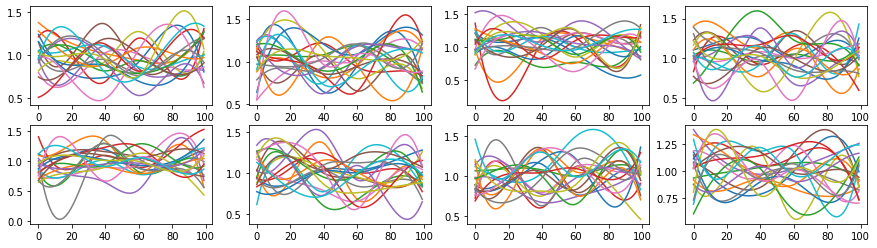

In [209]:
# plot random curves
sigma, knot = 0.2, 4
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(warping_magnitude(train_scailing_pd[:100], sigma, knot))

In [210]:
# apply to data
def warping_magnitude_apply(X, sigma, knot):
    return X * warping_magnitude(X, sigma, knot)

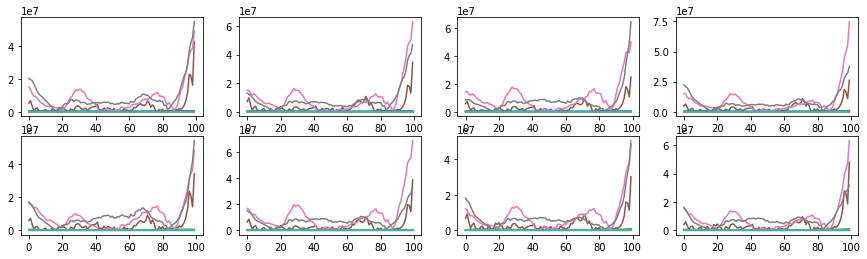

In [211]:
# plot warpped data
sigma, knot = 0.2, 4
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(warping_magnitude_apply(train_scailing_pd[:100], sigma, knot))

# Warping Time

In [216]:
# time warping
sigma, knot = 0.2, 4
def warping_time(X, sigma, knot):
    tt = warping_magnitude(X, sigma, knot)
    tt_cum = np.cumsum(tt, axis=0)
    
    t_scale = []
    for i in range(20):
        t_scale.append((X.shape[0]-1)/tt_cum[-1,i])
    
    for i in range(20):
        tt_cum[:, i] = tt_cum[:,i]*t_scale[i]
        
    return tt_cum

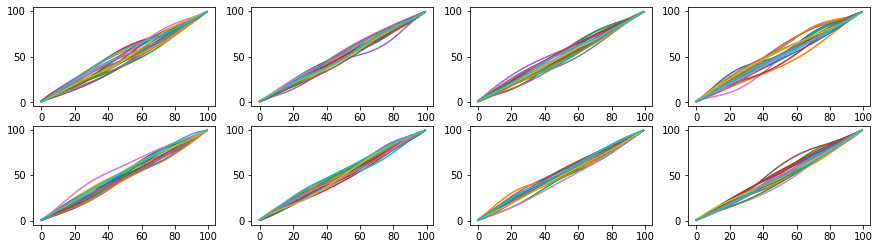

In [218]:
## Random curves around 1.0
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(warping_time(train_scailing_pd[:100], sigma, knot))

In [265]:
def warping_time_apply(X, sigma, knot):
    tt_new = warping_time(X, sigma, knot)
    X_new = np.zeros(X.shape)
    x_range = np.arange(X.shape[0])
    for i in range(20):
        X_new[:,i] = np.interp(x_range, tt_new[:,i], np.array(X)[:,i])
    return X_new

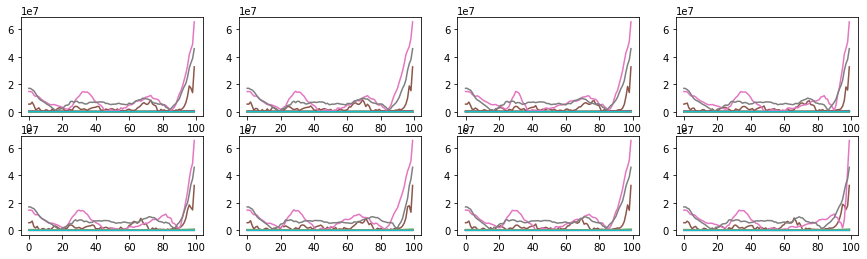

In [266]:
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.plot(warping_time_apply(train_scailing_pd[:100], sigma, knot))

# Rotation

In [289]:
from transforms3d.axangles import axangle2mat
def rotating(X):
    axis = np.random.uniform(low=-1, high=1, size=3)
    angle = np.random.uniform(low=-np.pi, high=np.pi)
    return np.matmul(np.array(X)[:, 2:5] , axangle2mat(axis,angle))

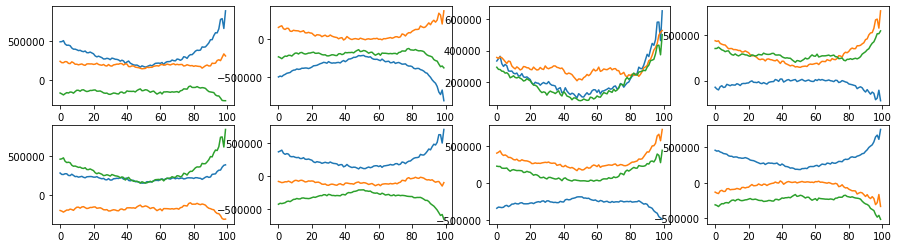

In [290]:
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.plot(rotating(train_scailing_pd[:100]))

# Permutating

In [296]:
nPerm = 4
minSegLength = 10

In [299]:
def permutating(X, nPerm, minSegLength):
    X_new = np.zeros(X.shape)
    idx = np.random.permutation(nPerm)
    bWhile = True
    while bWhile == True:
        segs = np.zeros(nPerm+1, dtype=int)
        segs[1:-1] = np.sort(np.random.randint(minSegLength, X.shape[0]-minSegLength, nPerm-1))
        segs[-1] = X.shape[0]
        if np.min(segs[1:]-segs[0:-1]) > minSegLength:
            bWhile = False
    pp = 0
    for i in range(nPerm):
        x_temp = np.array(X)[segs[idx[i]]:segs[idx[i]+1],:]
        X_new[pp:pp+len(x_temp),:] = x_temp
        pp += len(x_temp)
    return(X_new)

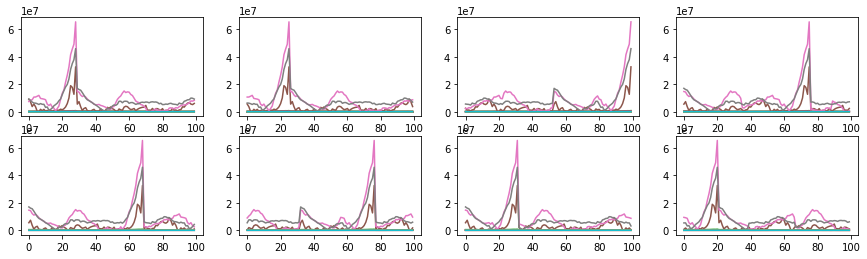

In [300]:
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.plot(permutating(train_scailing_pd[:100], nPerm, minSegLength))

# Random Sampling

In [301]:
nSample = 1000

In [302]:
def sampling(X, nSample):
    X_new = np.zeros(X.shape)
    tt = np.zeros((nSample,X.shape[1]), dtype=int)
    for i in range(20):
        tt[1:-1,i] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[-1,:] = X.shape[0]-1
    return tt

In [307]:
def apply_sampling(X, nSample):
    tt = sampling(X, nSample)
    X_new = np.zeros(X.shape)
    for i in range(20):
        X_new[:,i] = np.interp(np.arange(X.shape[0]), tt[:,i], np.array(X)[tt[:,0],i])
    return X_new

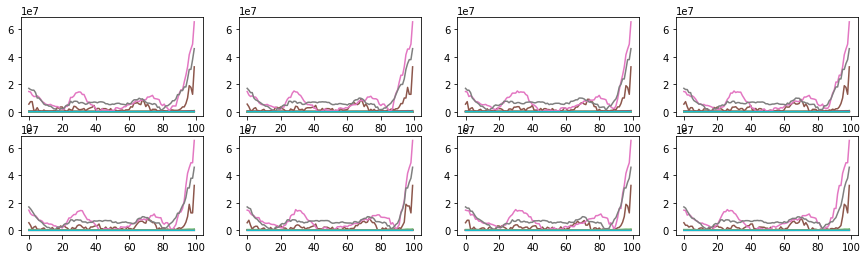

In [310]:
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.plot(apply_sampling(train_scailing_pd[:100], nSample))

# Combining

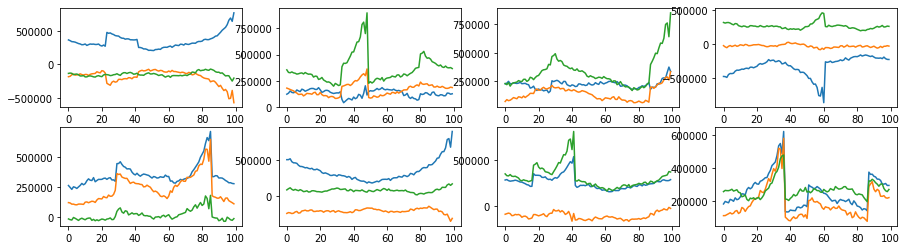

In [312]:
## Rotation + Permutation
fig = plt.figure(figsize=(15,4))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.plot(rotating(permutating(train_scailing_pd[:100], nPerm, minSegLength)))

In [ ]:
def std_scaler(train, test):
    scaler = StandardScaler()
    
    train_s.iloc[:,2:]= scaler.fit_transform(train.iloc[:,2:])
    train_s = pd.DataFrame(data = train_s,columns =col)

    test_s.iloc[:,2:]= scaler.transform(test.iloc[:,2:])
    test_s = pd.DataFrame(data = test_s,columns =col)
    
def minmax_scaler(train, test):
    scaler = MinMaxScaler()
    
    train_s.iloc[:,2:]= scaler.fit_transform(train.iloc[:,2:])
    train_s = pd.DataFrame(data = train_s,columns =col)

    test_s.iloc[:,2:]= scaler.transform(test.iloc[:,2:])
    test_s = pd.DataFrame(data = test_s,columns =col)
